## QT Assignment
A high-performance computing facility has 20 identical processors. Jobs (processes or threads
or tasks) arrive to the facility and joins a queue and wait for a free processor. A job consumes
250 milli seconds on an average and then exits the system. The jobs flow into the system is
shown below:<br>
Time (hrs) Jobs Volume (jobs/second)<br>
8:00 45<br>
8:30 67<br>
9:00 81<br>
9:30 87<br>
10:00 86<br>
10:30 72<br>
11:00 65<br>
11:30 58<br>
12:00 and later 47<br>

Answer the following questions:
1. When will the queue appear in this system?
2. Plot the graph of number of jobs in the queue (y-axis) versus time (x-axis).
3. What is the maximum queue length?
4. Find the total delay when the jobs are in the queue.

In [1]:
service_time = 0.250                            #250ms
job_rate = [45, 67, 81, 87, 86, 72, 65, 58, 47] #job rate every 30 min
Servers = 20                                    #number of servers

In [2]:
#job_rate: jobs/sec for 30-min interval
#30min = 1800seconds
AT=[]                                       #list of arrival times,

for index in range(len(job_rate)):
    iat = 1/job_rate[index]                 #IAT for this 30min interval
    base = 30*60*index                      #start time for this 30min interval 
    for i in range(30*60* job_rate[index]):
        #AT.append(round(base + iat*i, 3))
        AT.append(base + iat*i)              
        
print("Number of Arrivals: {}".format(len(AT)))
#print(AT[0], AT[45], AT[45*60*30])
#print(AT[45*60*30+67*60*30 + 81*60*30 + 87*60*30 + 86*60*30 + 72*60*30 + 65*60*30 +58*60*30 +47*60*30-1])

Number of Arrivals: 1094400


In [3]:
#SAT: Servers next available time
#Initially All available at time quantum 0. 
SAT = [0]*Servers                           #list next available times for servers
total_waiting_time = 0                      #cumulative waiting time for all jobs
server_index = min(SAT)                     #index of earliest available server
addition_to_queue = []                      #times when jobs are added to queue
departure_from_queue = []                   #times when jobs depart from queue

for arrival_time in AT:
    server_index = SAT.index(min(SAT))
    #server's next available time
    if arrival_time < SAT[server_index]:
        addition_to_queue.append(arrival_time)
        departure_from_queue.append(SAT[server_index])
        total_waiting_time = total_waiting_time + SAT[server_index] - arrival_time
        SAT[server_index] = SAT[server_index] + service_time
    else:
        SAT[server_index] = arrival_time + service_time


In [4]:
print("Total Arrival: {}".format(len(AT)))
print("Total Waiting Time(sec): {}".format(total_waiting_time))
print("Total Waiting Time(min): {}".format(total_waiting_time/60))

Total Arrival: 1094400
Total Waiting Time(sec): 88127087.16395944
Total Waiting Time(min): 1468784.7860659908


In [5]:
#print(len(addition_to_queue), len(departure_from_queue))
#print(addition_to_queue[-1], departure_from_queue[-1])

In [6]:
acount = 0                      #arrival count
dcount = 0                      #departure count
eventtime = []                  #event time, basically merge of arrival times and departures
qsize = []                      #number of jobs in queuue at corresponding time in eventtime
queuelen = 0                    #current queue length
while (acount < len(addition_to_queue)):
    if departure_from_queue[dcount] <= addition_to_queue[acount]:
        queuelen = queuelen - 1
        eventtime.append(departure_from_queue[dcount])
        qsize.append(queuelen)
        dcount = dcount + 1
    else:
        queuelen = queuelen + 1
        eventtime.append(addition_to_queue[acount])
        qsize.append(queuelen)
        acount = acount + 1
while (dcount < len(departure_from_queue)):
    queuelen = queuelen = 1
    eventtime.append(departure_from_queue[dcount])
    qsize.append(queuelen)
    dcount = dcount + 1
#print(acount, dcount)
#print(len(qsize), len(eventtime))

In [7]:
maxqlen = max(qsize)
maxqlen_index = qsize.index(maxqlen)
maxqlen_etime = eventtime[maxqlen_index]
eventtime.pop(maxqlen_index)
qsize.pop(maxqlen_index)

25200

/Volumes/Samsung_T5_MacOS/AppDev/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


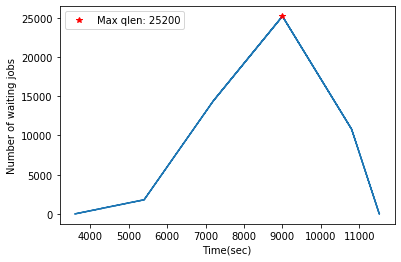

In [9]:
import matplotlib.pyplot as plt
plt.plot(eventtime, qsize)
plt.plot(maxqlen_etime, maxqlen, 'r*', label = "Max qlen: {}".format(maxqlen))
plt.xlabel("Time(sec)")
plt.ylabel("Number of waiting jobs")
plt.legend()
plt.show()